In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

The main parameters of the transformer selected from Kulkrani's book Transformer Design and Pracitce in Engineering (2004 ,chapter 4, pp 162-164)

Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.623 s
Magnetic Energy 401.0793042892105
zb, ib: 108.9 ohm 174.95 A
SCI: 7.56 [%]
Bax  [HV] = 83.08 [mT]
Brad [HV] = 34.03 [mT]
Bax  [LV] = 70.74 [mT]
Brad [Lv] = 40.81 [mT]


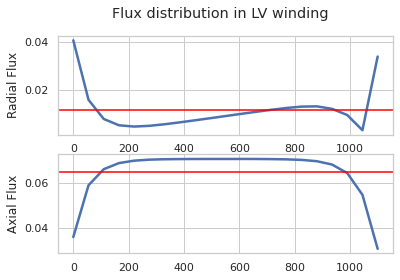

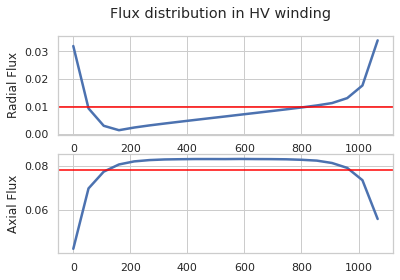

In [2]:
from importlib_resources import files
from src.two_winding_model import TransformerDesign, TwoWindingModel

path = files("data").joinpath("10MVA_example.json")

import json

with open(path) as json_file:
    data = json.load(json_file)

transformer = TransformerDesign.from_dict(data)

trafo_model = TwoWindingModel(input=transformer)
trafo_model.calculate(is_sc=False)

# FEM calculation
trafo_model.fem_simulation()


### Main results in contrast to the measurements

Turn voltage = 46.87 ~ 46.64
SCI = 7.34% 

In [3]:
print(trafo_model.results)

MainResults(wh=1320.0, feasible=True, core_loss=8.2, load_loss=49.18236830137418, copper_mass=0.0, sci=7.38, window_width=198.4, core_mass=7751.0, turn_voltage=46.64, capitalized_cost=0.0, fem_based_sci=7.560166775171334, fem_bax_hv=0.08307922545680552, fem_brad_hv=0.03402941230262568, fem_bax_brad_hv=0.0, fem_bax_lv=0.0707351213303279, fem_brad_lv=0.040808489701815276, fem_bax_brad_lv=0.0)


### Comparing the LV winding results with the manufactured winding:

In [4]:
print(trafo_model.lv_winding)

WindingDesign(inner_radius=230.0, thickness=35.0, winding_height=1100.0, filling_factor=70.0, current_density=2.65, mass=1158.5, dc_loss=19.7, ac_loss=1.4808726021936713, outer_radius=265.0, cable_length=0.0, amper_turns=71417.5)


The inner radius of the measured transformer model is 460/2 = 230 mm, while the outer radius is 530/2 = 265. Therefore the model calculates well these values from the given parameters. 
The estimated AC loss by Kulkarni is 489 W/phase, while the code calculates 1.44/3 = 480 W for the losses. 
The DC losses approximated by the filling factor of the given transformer coil.
The total loss of the LV windings is given 21.8 kW, while the built-in vode calculates: 19.9 kW + 1.45 kW = 21.35 kW

### Comparing the results with the HV calculations:

In [5]:
print(trafo_model.hv_winding)

WindingDesign(inner_radius=315.0, thickness=43.4, winding_height=1067.0, filling_factor=60.0, current_density=2.57, mass=1620.0, dc_loss=25.9, ac_loss=2.101495699180512, outer_radius=358.4, cable_length=0.0, amper_turns=71406.6)


The inner radius of the HV winding agrees well with manufactured transformers data, which is 630/2 = 315 mm, the outer diameter of the HV winding is 718 mm, which agrees the outer radius of the transformer winding 359.